# SQLite Database Creator

### Introduction to SQLite and Pandas

#### What is SQLite?

SQLite is a lightweight, disk-based (saves to your computer) SQL database that doesn't require a separate server process. It is commonly used for local development with SQL in Python since it is reliable, compact, and requires little setup, making it ideal for small to medium-sized apps.

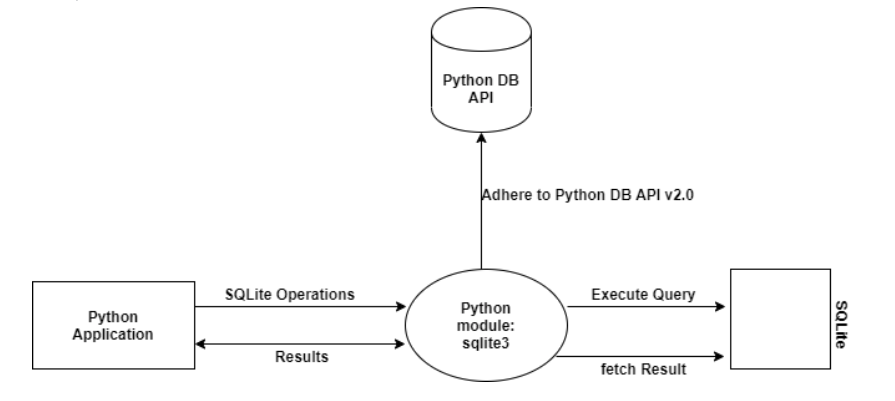


Reference: [Geeks for Geeks - Python SQLite](https://www.geeksforgeeks.org/introduction-to-sqlite-in-python/)

#### TLDR - SQLite:
To connect or create a SQL database, the `sqlite3.connect('example.db')`, which you change 'example.db' for your own .db file, command is used to establish a connection to an SQLite database located at a specified path.

In SQLite, `conn.cursor()` is used to create a cursor object which allows you to execute SQL commands through Python and interact with the SQLite database. This is essential for performing queries, updates, and deletions within the database. 

On the other hand, `conn.close()` closes the connection to the database. Closing the database connection is crucial for freeing up system resources and ensuring that all changes are committed to the database file, preventing data loss or corruption.

#### What is Pandas?
Pandas is an open-source data analysis and manipulation library in Python. It allows users to work with different data structures and operations. 

References:
- [Built In - SQLite](https://builtin.com/data-science/sqlite)
- [Geeks for Geeks - Python SQLite – Creating a New Database](https://www.geeksforgeeks.org/python-sqlite-creating-a-new-database/)
- [Geeks for Geeks - Creating a sqlite database from CSV with Python](https://www.geeksforgeeks.org/creating-a-sqlite-database-from-csv-with-python/)
- [Pandas DataFrames](https://realpython.com/pandas-dataframe/)

#### Installation

Either run the command:
+ run `!pip install -r requirements.txt` below

OR

+ run `!pip install SQLALchemy pandas anthropic langchain-anthropic langchain langchain-community` below

In [1]:
import sqlite3
import pandas as pd

#### SQLite Data Table Loader

The `csv_to_sqlite` function loads data from a CSV file into an SQLite database by reading the CSV file into a pandas DataFrame, writing the DataFrame to the specified SQLite table, and then closes the database connection for data integrity.

The csv data is stored in the `csv_data` subdirectory. The `sql_db` subdirectory contains the `emergency_department_database.db`. 

It takes three parameters: 
1. The name of the CSV file (`csv_file_name`)
2. The target table name within the SQLite database (`table_name`)
3. The database file name (`database_name`).

In [2]:
# Function to read CSV and write to SQLite table
def csv_to_sqlite(csv_file_name, table_name, database_name):
    
    # Connecting to SQLite database
    conn = sqlite3.connect(database_name)
    
    # Loads CSV data into Pandas DataFrame
    data = pd.read_csv(csv_file_name)
    
    # Writes the data to a sqlite table
    data.to_sql(table_name, conn, if_exists='replace', index=False)
    
    # Closes connection to SQLite database
    conn.close()

## MIMIC-IV Data 

MIMIC-IV-ED is a publicly accessible database of over 400,000 emergency department (ED) admissions to the Beth Israel Deaconess Medical Center between 2011 and 2019.

In this tutorial, we will be using the MIMIC-III Clinical Database Demo since it contains medical information necessary for medical triaging collected in the ED and is publicly available. Generally, access to MIMIC-IV-ED requires registration on PhysioNet, identity verification, completion of human participant training, and signing of a data use agreement, but this data set is accessible to the public for demonstration and educational purposes. 

The data consists of a subset of 100 patients. The MIMIC-IV-ED demo is a relational database containing a single patient tracking table, edstays, and five data tables: 
1. **diagnosis** (data table provides coded diagnoses associated with each ED visit, based on the International Classification of Diseases (ICD) ontology).
2. **medrecon** (data table containing information about the medications the patient took prior to their ED visit - medication reconciliation).
3. **pyxis** (data table containing information about medications dispensed from the automated Pyxis MedStation system, an automated medication dispensing system developed by BD, during the ED visit). 
4. **triage** (data table containing information collected during the triage process, including vital signs, pain level, and the chief complaint reported by the patient).
5. **vitalsign** (data table containing the vital sign measurements documented for the 100 patients during their ED stay).

References:
- [MIMIC-IV-ED](https://physionet.org/content/mimic-iv-ed-demo/2.2/ed/#files-panel)
- [PhysioNet](https://physionet.org/)
- [BD Pyxis Medstattion](https://www.bd.com/en-uk/products-and-solutions/products/product-families/bd-pyxis-medstation-es-system)
- [ICD](https://www.cdc.gov/nchs/icd/index.htm#:~:text=There%20are%20two%20related%20classifications,mortality%20data%20from%20death%20certificates.) 

In [3]:
# Defining database name
db_name = 'sql_db/emergency_department_database.db'

# Listing CSV files and their corresponding table names
csv_files_table_names = {
    'diagnosis.csv': 'diagnosis',
    'edstays.csv': 'edstays',
    'medrecon.csv': 'medrecon',
    'pyxis.csv': 'pyxis',
    'triage.csv': 'triage',
    'vitalsign.csv': 'vitalsign'
}

In [4]:
# Iterating over the dictionary, calling the function for each CSV/table pair
for csv_file, table_name in csv_files_table_names.items():
    csv_file_path = f'csv_data/{csv_file}'
    csv_to_sqlite(csv_file_path, table_name, db_name)

In [5]:
# Connecting to SQLite database
conn = sqlite3.connect('sql_db/emergency_department_database.db')
cursor = conn.cursor()

In [6]:
for table_name in ['diagnosis', 'edstays', 'medrecon', 'pyxis', 'triage', 'vitalsign']:
    cursor.execute(f'SELECT * FROM {table_name} LIMIT 10')
    print(f"First 5 entries from the '{table_name}' table:")
    for row in cursor.fetchall():
        print(row)
    print("\n")

# Closing the connection
conn.close()

First 5 entries from the 'diagnosis' table:
(10025463, 35470228, 1, '431', 9, 'INTRACEREBRAL HEMORRHAGE')
(10027602, 36678718, 1, '431', 9, 'INTRACEREBRAL HEMORRHAGE')
(10009049, 31628990, 1, '486', 9, 'PNEUMONIA,ORGANISM UNSPECIFIED')
(10014078, 38676365, 1, '3453', 9, 'GRAND MAL STATUS')
(10007928, 39661025, 1, '5780', 9, 'HEMATEMESIS')
(10019777, 30952335, 1, '5789', 9, 'GASTROINTEST HEMORR NOS')
(10006580, 32259573, 1, '7231', 9, 'CERVICALGIA')
(10019385, 30324772, 1, 'R079', 10, 'Chest pain, unspecified')
(10029291, 39297781, 1, 'I2692', 10, 'Saddle embolus of pulmonary artery w/o acute cor pulmonale')
(10015272, 33473053, 1, 'I2699', 10, 'Other pulmonary embolism without acute cor pulmonale')


First 5 entries from the 'edstays' table:
(10014729, 23300884.0, 37887480, '2125-03-19 12:36:00', '2125-03-19 16:59:47', 'F', 'WHITE - OTHER EUROPEAN', 'WALK IN', 'ADMITTED')
(10018328, 26706939.0, 34176810, '2154-02-05 17:09:00', '2154-02-05 22:54:00', 'F', 'WHITE', 'AMBULANCE', 'ADMITTED

#### Text-to-SQL

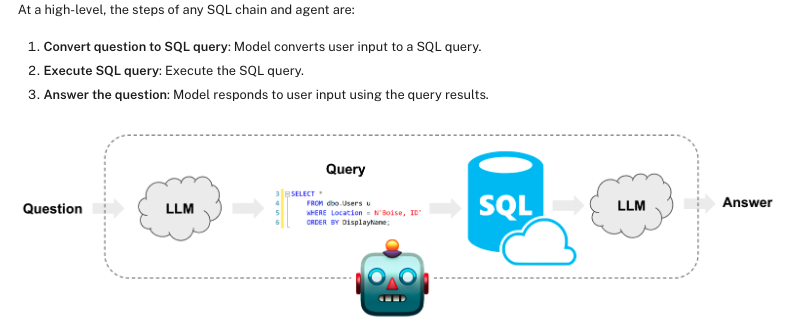

Reference: [LangChain - SQL Agent](https://python.langchain.com/docs/use_cases/sql/quickstart/)

In following notebooks in this tutorial 2 folder, the focus will be on creating a *Text-to-SQL* system that enables users to query their database(s) using natural language. This type of system abstracts the need to make complex SQL queries, lowering the barrier for users to conduct robust data analysis.  

In the context of public health and epidemiology, Text-to-SQL can enable faster querying of medical and clinical information, which we will be exploring this method on the MIMIC-IV-ED dataset. 